In [38]:
import os
import json
import statistics
import matplotlib.pyplot as plt

In [39]:
filenames = [ f for f in os.listdir() if f.split('.')[-1] == 'json' ]
filenames

['result-0.json', 'result-1.json']

In [44]:
statparse = {}
for fname in filenames:
    with open(fname) as f: data = json.loads(f.read())
    duration = int(fname.split('.')[0].split('-')[-1])
    statparse[duration] = {}
    for kind in data.keys():
        dat = data[kind]
        statparse[duration][kind] = {}
        statparse[duration][kind]['avg'] = statistics.mean(dat)
        statparse[duration][kind]['std'] = statistics.stdev(dat)
        statparse[duration][kind]['raw'] = data[kind]

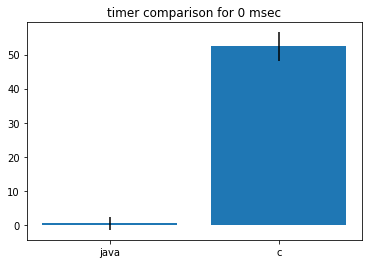

<Figure size 432x288 with 0 Axes>

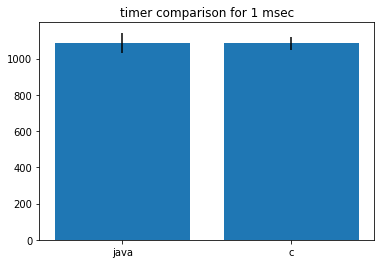

<Figure size 432x288 with 0 Axes>

In [85]:

for duration in statparse:
    fig, ax = plt.subplots()
    
    j = statparse[duration]['java']
    c = statparse[duration]['c']
    
    kinds = ['java','c']
    CTEs = [j['avg'], c['avg']]
    error = [j['std'],c['std']]
    xpos = [x for x in range(len(kinds))]
    
    ax.bar(xpos, CTEs, yerr=error)
    ax.set_xticks(xpos)
    ax.set_xticklabels(['java','c'])
    ax.set_title("timer comparison for "+str(duration)+" msec")
    plt.savefig('time-comapre-'+str(duration))
    plt.show()
    plt.clf()
        
        